In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [8]:
boston_dataset=load_boston()
# boston is a disctionary 
print(boston_dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [81]:
boston=pd.DataFrame(boston_dataset.data,columns=[boston_dataset.feature_names])
boston['MEDV']=boston_dataset.target

print(boston.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [17]:
# finding best correlation
correlate=boston.corr()
best_fit=[]
for x,y in correlate.iteritems():
    if((y["MEDV"]<=-0.5 or y["MEDV"]>=0.5) and y['MEDV']!=1):
        print(x,'\n',y['MEDV'])
        best_fit.append(x)


('RM',) 
 0.6953599470715401
('PTRATIO',) 
 -0.5077866855375623
('LSTAT',) 
 -0.7376627261740145


In [83]:
#separating the best_fit from dataset
print("Features with Best correlation with target:",best_fit,'\n')
X=pd.DataFrame(boston[best_fit],columns=best_fit)
Y=boston['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=43)

Features with Best correlation with target: [('RM',), ('PTRATIO',), ('LSTAT',)] 



In [84]:
# Training the model
reg=linear_model.LinearRegression()
reg.fit(X_train,Y_train)
y_predicted=reg.predict(X_test)


167

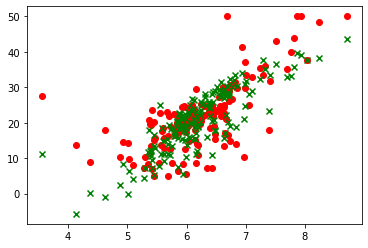

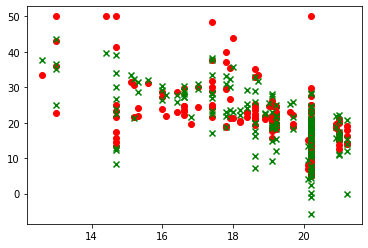

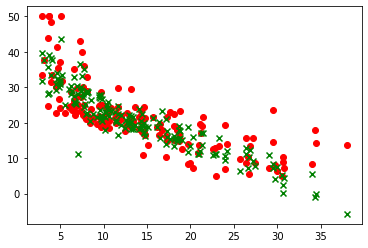

In [85]:
for x in best_fit:
    plt.scatter(X_test[x],Y_test,color='r',marker='o')
    plt.scatter(X_test[x],y_predicted,color='g',marker='x')
    plt.show()


In [105]:
# just checking data for practice
print("Max of",boston[i].max(),'\n','Min of',boston['MEDV'].min())
for i in best_fit:
    print("Max of ",i,boston[i].max(),'\n','Min of',i,boston[i].min())


Max of MEDV    50.0
dtype: float64 
 Min of MEDV    5.0
dtype: float64
Max of  ('RM',) 8.78 
 Min of ('RM',) 3.561
Max of  ('PTRATIO',) 22.0 
 Min of ('PTRATIO',) 12.6
Max of  ('LSTAT',) 37.97 
 Min of ('LSTAT',) 1.73
